# Lab One: Visualization and Data Preprocessing

by Nino Castellano, Aayush Dalal, Chloe Prowse, Muskaan Mahes

## 1. Business Understanding 

The Student Placement Dataset from Kaggle was collected and analyzed to determine whether students’ results were sufficient to obtain a job offer. The dataset contained over 50,000 records consisting of academic, technical, and soft-skill attributes that can influence the outcome of being placed or not. Therefore, the primary purpose of the dataset is to help students and educational institutions understand which factors are crucial for achieving a successful placement outcome. Using placement results is important, as they can provide real-world examples that can serve as a template for assessing how well a student is prepared for the job market. 

The main objective of this analysis is to explore the relationships between students’ key features and their placement outcome to identify important insights. Therefore, the target variable from the training set, placement status, was used to measure the effectiveness of the student outcome. 


## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
# Importing Train Dataset for Intial EDA
df = pd.read_csv("train.csv")

# Importing Train Dataset for Model Training
train_df = pd.read_csv("train.csv")

# Impoting Test Dataset for Final Predictions
test_df = pd.read_csv("test.csv")


### 2.1 Describing the Meaning and Type of Data for Each Feature

### 2.2 Verifying Data Quality (Missing Values, Duplicate Data, Outliers)

After analyzing the dataset, no missing or duplicated data was identified. However, after calculating the interquartile range (IQR) for each numeric variable, several columns were flagged to have potential outliers. These variables were identified to be CGPA, Internships, Projects, and Soft_Skills_Rating. 

### 2.3 Give Simple Appropriate Statistics 

In [2]:
df = pd.read_csv("train.csv")

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
count,45000.000000,45000.000000,45000,45000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000
unique,NaN,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,B.Sc,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Placed
freq,NaN,NaN,22620,11357,9056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28688
mean,24977.962600,20.999333,NaN,NaN,NaN,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133,NaN
std,14425.605704,1.995071,NaN,NaN,NaN,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954,NaN
min,1.000000,18.000000,NaN,NaN,NaN,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,NaN
25%,12509.750000,19.000000,NaN,NaN,NaN,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000,NaN
50%,24957.500000,21.000000,NaN,NaN,NaN,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000,NaN
75%,37475.250000,23.000000,NaN,NaN,NaN,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000,NaN


## Dataset Overview and Structure

The Student Placement Dataset contains **45,000 observations** and **15 attributes**, capturing student demographics, academic performance, skill assessments, experiential learning indicators, and placement outcomes.

Inspection of the dataset structure confirms that all variables are correctly typed, with numeric variables representing quantitative measures (e.g., CGPA, skills, aptitude scores) and categorical variables representing qualitative attributes (e.g., gender, degree, branch, placement status). Summary statistics indicate consistent value ranges and plausible distributions across variables.

This initial inspection provides confidence that the dataset is well-structured and suitable for descriptive and inferential analysis.


In [3]:
numeric_cols = df.select_dtypes(include=np.number)

numeric_summary = numeric_cols.agg(
    ['mean', 'median', 'min', 'max', 'std', 'var']
).T

numeric_summary

,mean,median,min,max,std,var
Student_ID,24977.962600,24957.5,1.0,50000.0,14425.605704,2.080981e+08
Age,20.999333,21.0,18.0,24.0,1.995071,3.980310e+00
CGPA,7.002290,7.0,4.5,9.8,0.993855,9.877481e-01
Internships,0.774089,1.0,0.0,3.0,0.844750,7.136022e-01
Projects,3.734222,4.0,1.0,6.0,0.923738,8.532922e-01
Coding_Skills,5.691800,6.0,1.0,10.0,1.994674,3.978723e+00
Communication_Skills,5.501644,6.0,1.0,10.0,1.515374,2.296359e+00
Aptitude_Test_Score,69.385356,69.0,35.0,100.0,13.909710,1.934800e+02
Soft_Skills_Rating,5.501644,5.0,1.0,10.0,1.238722,1.534431e+00
Certifications,1.800956,2.0,0.0,3.0,0.650104,4.226351e-01


## Summary Statistics for Numeric Variables

Descriptive statistics were computed for all numeric variables, including the **mean, median, minimum, maximum, standard deviation, and variance**. These metrics summarize central tendency and dispersion, offering insight into the overall distribution of each quantitative attribute.

The results indicate moderate academic performance (mean CGPA ≈ 7.0), moderate skill ratings across technical and soft skill categories, and meaningful variability in aptitude test scores. Variables such as internships, projects, certifications, and backlogs show discrete distributions with limited upper bounds, reflecting structured academic and recruitment constraints.

These statistics establish a quantitative baseline for identifying variables that may influence placement outcomes.


In [4]:
range_summary = numeric_cols.max() - numeric_cols.min()
range_summary

Student_ID              49999.0
Age                         6.0
CGPA                        5.3
Internships                 3.0
Projects                    5.0
Coding_Skills               9.0
Communication_Skills        9.0
Aptitude_Test_Score        65.0
Soft_Skills_Rating          9.0
Certifications              3.0
Backlogs                    3.0
dtype: float64

## Range and Variability Analysis

The range of each numeric variable was calculated to assess the extent of variability within the dataset. Age exhibits a narrow range (18–24), indicating low dispersion and limited explanatory power in isolation.

In contrast, variables such as **CGPA**, **aptitude test scores**, and **skill ratings** display wider ranges, suggesting substantial heterogeneity among students. This variability is important, as it indicates the presence of both high- and low-performing individuals across key evaluative dimensions.

Range analysis complements standard deviation and variance by highlighting the full span of observed values.


In [5]:
categorical_cols = df.select_dtypes(include='object')

categorical_modes = categorical_cols.mode().iloc[0]
categorical_modes

Gender                  Female
Degree                    B.Sc
Branch                      ME
Placement_Status    Not Placed
Name: 0, dtype: object

## Categorical Variable Distributions

For categorical variables, the **mode** was computed to identify the most frequently occurring category in each attribute. The results show that the most common student profile includes a **female gender**, a **B.Sc degree**, specialization in **Mechanical Engineering**, and a **not placed** outcome.

These modal values provide a high-level summary of the dominant characteristics within the dataset and offer contextual insight into overall placement trends.


In [6]:
missing_summary = df.isna().sum()
missing_summary

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64

## Missing Data Assessment

An evaluation of missing values across all variables indicates that **no missing observations are present** in the dataset.

The absence of missing data strengthens the reliability of descriptive statistics and eliminates the need for imputation or row exclusion. As a result, all 45,000 observations contribute fully to subsequent analyses, reducing potential sources of bias.


In [7]:
df['CGPA'].mean(), df['CGPA'].median()

(np.float64(7.0022902222222205), np.float64(7.0))

## CGPA Distribution Characteristics

A focused examination of CGPA reveals that the **mean and median are both approximately 7.0**, indicating a balanced distribution of academic performance. This alignment suggests minimal skewness and confirms that the CGPA distribution is representative of the broader student population.

Given its central role in recruitment screening, CGPA emerges as a potentially influential variable, particularly when combined with experiential and skill-based attributes.


## Descriptive Statistics

This section presents summary statistics for the Student Placement Dataset,
including measures of central tendency and variability for key attributes.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
count,45000.000000,45000.000000,45000,45000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000
unique,NaN,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,B.Sc,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Placed
freq,NaN,NaN,22620,11357,9056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28688
mean,24977.962600,20.999333,NaN,NaN,NaN,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133,NaN
std,14425.605704,1.995071,NaN,NaN,NaN,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954,NaN
min,1.000000,18.000000,NaN,NaN,NaN,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,NaN
25%,12509.750000,19.000000,NaN,NaN,NaN,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000,NaN
50%,24957.500000,21.000000,NaN,NaN,NaN,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000,NaN
75%,37475.250000,23.000000,NaN,NaN,NaN,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000,NaN


In [9]:
numeric_summary.round(2)

,mean,median,min,max,std,var
Student_ID,24977.96,24957.5,1.0,50000.0,14425.61,2.080981e+08
Age,21.00,21.0,18.0,24.0,2.00,3.980000e+00
CGPA,7.00,7.0,4.5,9.8,0.99,9.900000e-01
Internships,0.77,1.0,0.0,3.0,0.84,7.100000e-01
Projects,3.73,4.0,1.0,6.0,0.92,8.500000e-01
Coding_Skills,5.69,6.0,1.0,10.0,1.99,3.980000e+00
Communication_Skills,5.50,6.0,1.0,10.0,1.52,2.300000e+00
Aptitude_Test_Score,69.39,69.0,35.0,100.0,13.91,1.934800e+02
Soft_Skills_Rating,5.50,5.0,1.0,10.0,1.24,1.530000e+00
Certifications,1.80,2.0,0.0,3.0,0.65,4.200000e-01


## Presentation-Ready Summary Statistics

For clarity and interpretability, numeric summary statistics were rounded to two decimal places. This formatting enhances readability while preserving statistical accuracy, making the results suitable for reporting and visualization.

The rounded summaries reinforce previously observed patterns, including moderate central tendencies, bounded ranges, and meaningful variability across performance-related attributes.


### 2.4 Visualize Most Important Features
#### Determining Most Important Features Visually

#### Approach:
1. Visualize Each Feature on Placement Status Individually 
2. Run Random Forest Feature Selection Algorithm (No Feature Scaling Required)

In [10]:
# Creating DataFrame to show feature names and their data types
df_types = pd.DataFrame({ "feature": df.columns, "datatype": df.dtypes.astype(str) }) 
df_types

,feature,datatype
Student_ID,Student_ID,int64
Age,Age,int64
Gender,Gender,object
Degree,Degree,object
Branch,Branch,object
CGPA,CGPA,float64
Internships,Internships,int64
Projects,Projects,int64
Coding_Skills,Coding_Skills,int64
Communication_Skills,Communication_Skills,int64


#### Age Feature

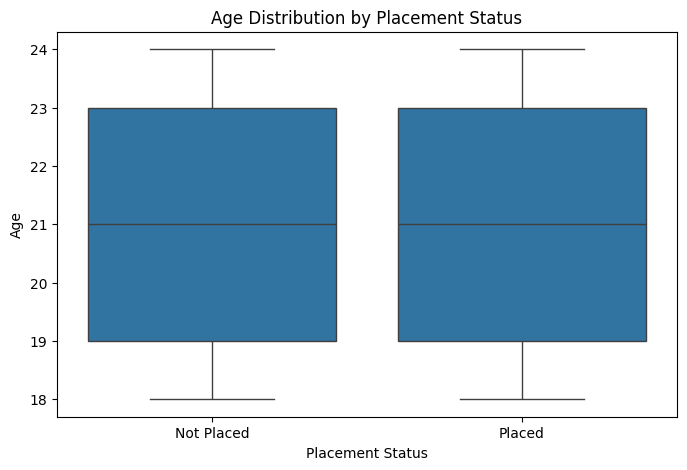

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Placement_Status', y='Age', data=df)

plt.title('Age Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Age')

plt.show()

This visualization compares the age distribution between placed and not placed students. I used it to check whether age has a meaningful relationship with placement outcomes. From the plot, we can see whether placed students tend to cluster around certain age ranges or if age has minimal impact.The box plot illustrates that the age distributions of students who were Placed versus Not Placed are nearly identical. Both groups share similar medians, interquartile ranges, and overall spread, suggesting that age does not play a significant role in job placement outcomes.

#### Gender Feature

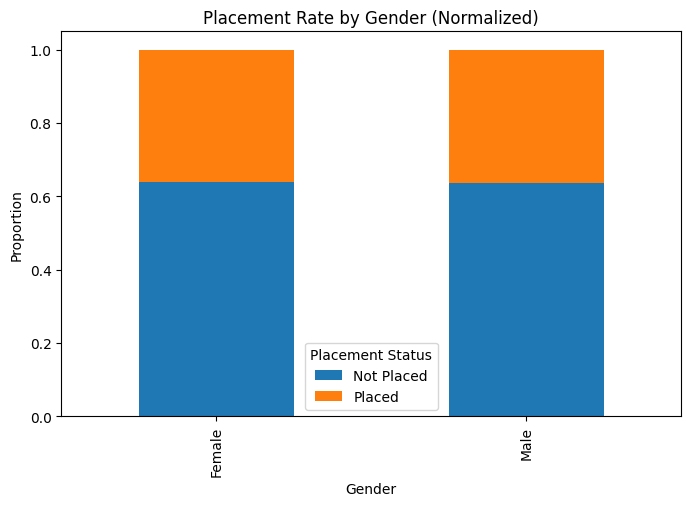

In [12]:
gender_placement = (
    df.groupby(['Gender', 'Placement_Status'])
    .size()
    .unstack()
)

gender_norm = gender_placement.div(gender_placement.sum(axis=1), axis=0)

gender_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Gender (Normalized)')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()

This normalized bar chart breaks down placement outcomes by gender, showing the proportion of students who were Placed versus Not Placed within each gender group. For both males and females, the distribution is strikingly similar—roughly 35% placed and 65% not placed—indicating that gender does not appear to significantly influence job placement rates.

#### Degree Feature 

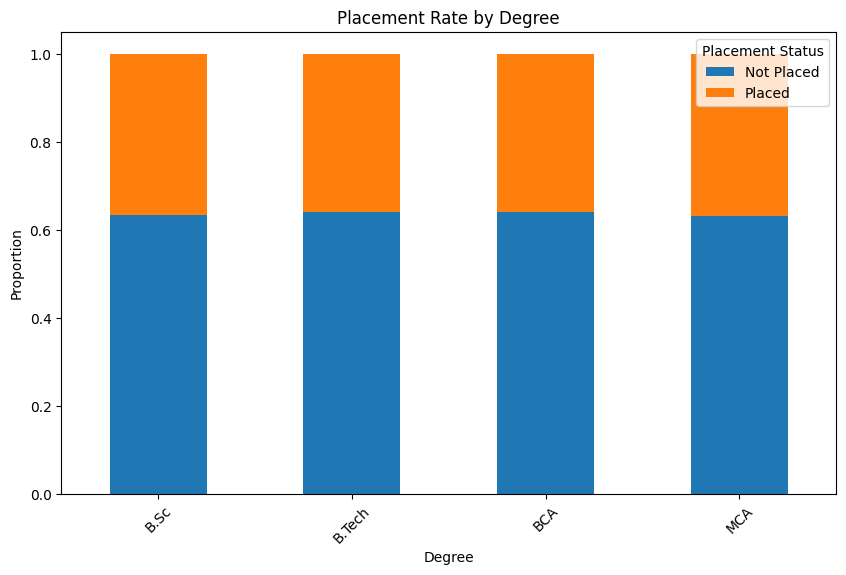

In [13]:
degree_placement = (
    df.groupby(['Degree', 'Placement_Status'])
    .size()
    .unstack()
)

degree_norm = degree_placement.div(degree_placement.sum(axis=1), axis=0)

degree_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title('Placement Rate by Degree')
plt.xlabel('Degree')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.xticks(rotation=45)
plt.show()

Degree is a nominal categorical feature, so instead of raw counts, I focused on normalized placement rates to avoid bias from uneven category sizes. This allowed me to identify which degree types are associated with higher placement likelihood. The normalized bar chart shows that placement proportions across the different degree types are broadly similar, with no major differences between them. While there are slight variations, the overall pattern suggests that degree type is not a visually significant factor in determining whether a student is placed or not.

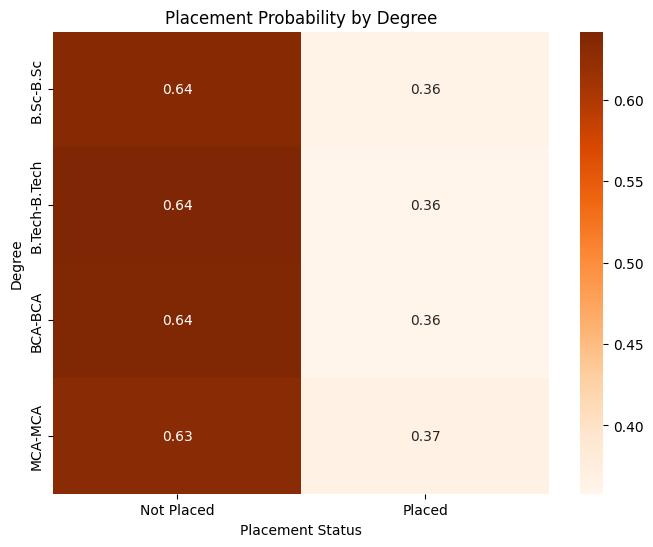

In [14]:
heatmap_data = (
    df.groupby(['Degree', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Degree')
plt.xlabel('Placement Status')
plt.ylabel('Degree')
plt.show()


The heatmap displays placement probabilities across degree types, and the values are remarkably consistent. All degrees—B.Sc, B.Tech, BCA, and MCA—show nearly identical probabilities of being placed (around 36–37%) and not placed (around 63–64%). This reinforces the earlier visual findings: degree type does not appear to be a major differentiator in placement outcomes.

#### Branch Feature

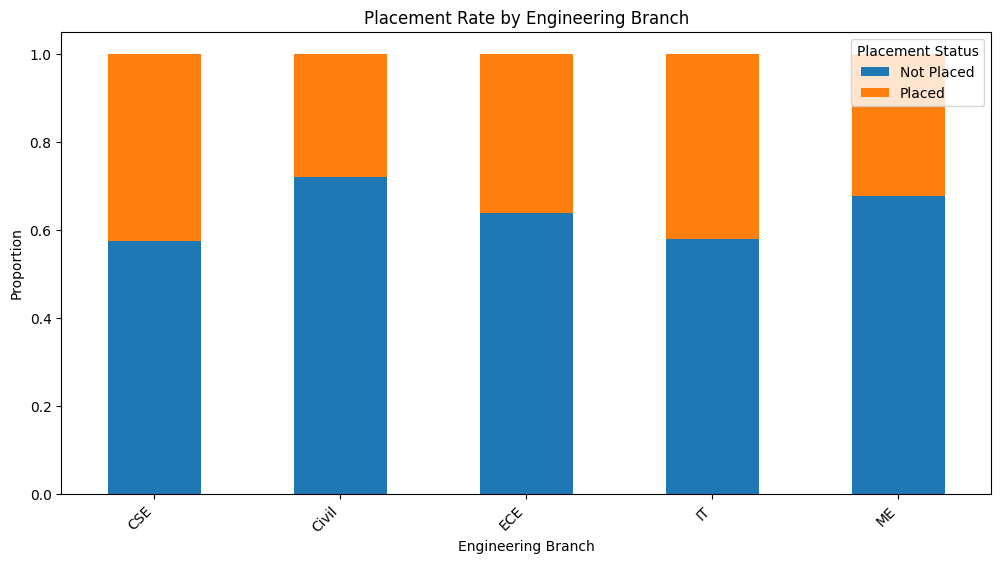

In [15]:
branch_placement = (
    df.groupby(['Branch', 'Placement_Status'])
    .size()
    .unstack()
)

branch_norm = branch_placement.div(branch_placement.sum(axis=1), axis=0)

branch_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Placement Rate by Engineering Branch')
plt.xlabel('Engineering Branch')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.xticks(rotation=45, ha='right')
plt.show()

The normalized bar chart compares placement proportions across engineering branches, revealing slight differences in placement rates. Branches like CSE and IT show marginally higher placement proportions, which could suggest that specialization may play a role in placement outcomes. However, these differences are not pronounced, and further statistical analysis would be needed to confirm whether branch is a significant predictor of placement.

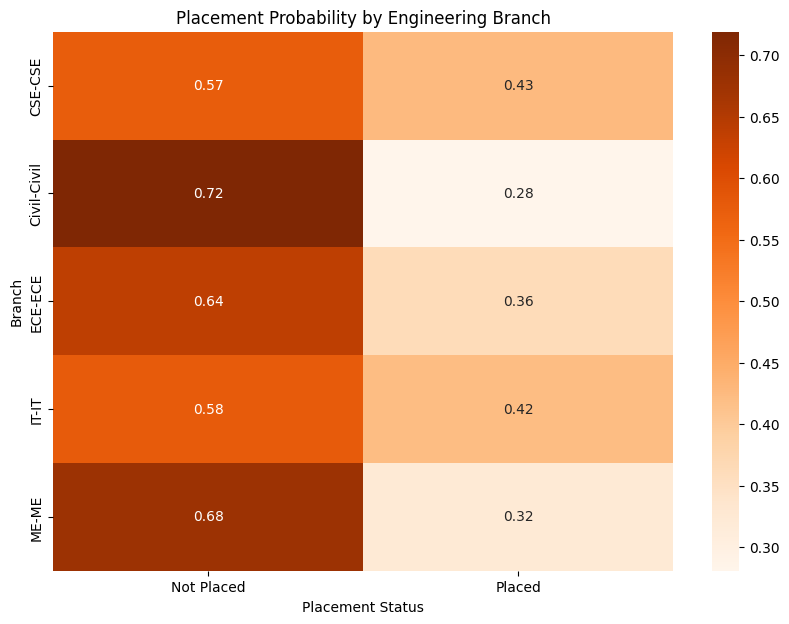

In [16]:
heatmap_data = (
    df.groupby(['Branch', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

plt.figure(figsize=(10,7))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Engineering Branch')
plt.xlabel('Placement Status')
plt.ylabel('Branch')
plt.show()

To investigate subtle differences in placement outcomes across engineering branches, I used a heatmap to visualize normalized probabilities. Unlike bar charts, heatmaps allow for quick comparison of exact values and color intensity, making it easier to spot patterns across categories.

The results reveal meaningful variation in placement probabilities among branches. For example, CSE and IT show higher placement probabilities (around 42–43%), while Civil and ME have noticeably lower rates (28–32%). This suggests that branch specialization may influence placement outcomes, and these differences warrant further analysis to assess statistical significance.

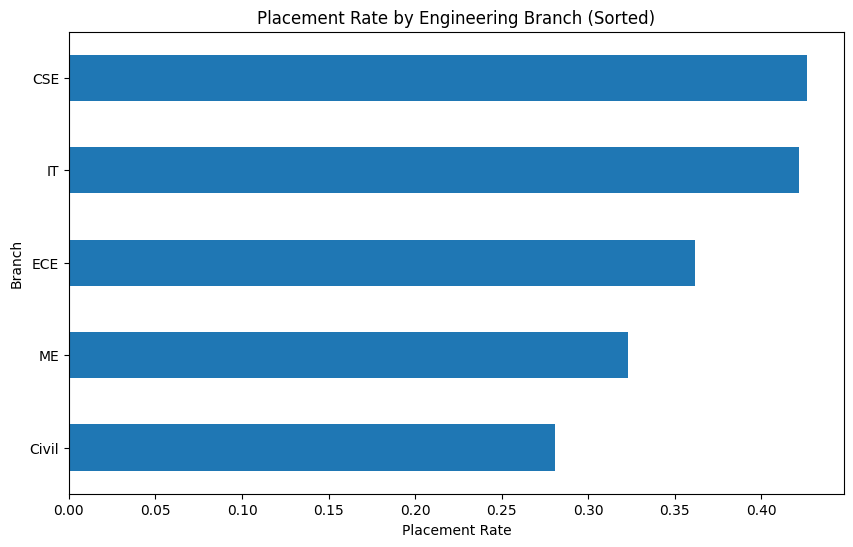

In [17]:
placement_rate = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Branch')
    .size() / df.groupby('Branch').size()
)

placement_rate.sort_values().plot(
    kind='barh',
    figsize=(10,6)
)

plt.title('Placement Rate by Engineering Branch (Sorted)')
plt.xlabel('Placement Rate')
plt.ylabel('Branch')
plt.show()


To better highlight differences in placement outcomes across engineering branches, I created a sorted bar chart ranking branches by placement rate. This visualization makes it easier to compare performance side by side and spot trends that may be less obvious in unsorted formats.

The chart shows that CSE and IT have the highest placement rates, followed by ECE, ME, and Civil at the bottom. This ordering reinforces earlier observations from the heatmap and stacked bar chart—certain branches, particularly CSE and IT, may offer better placement prospects. These differences suggest that branch specialization could be an influential factor worth exploring further through statistical modeling.

#### C-GPA Feature

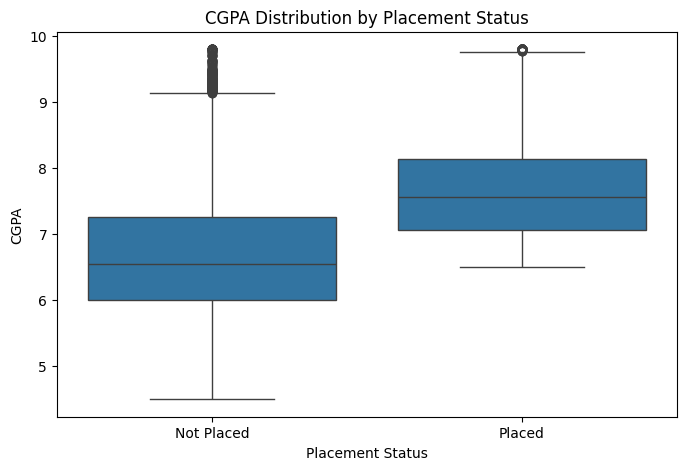

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='CGPA', data=df)

plt.title('CGPA Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()

To examine how CGPA relates to placement outcomes, I chose a box plot to visualize the distribution of GPAs for placed and not placed students. Box plots are ideal for comparing central tendency, spread, and outliers between groups, making it easier to detect meaningful differences.

The results show a noticeable shift in CGPA distributions between the two groups. Students who were placed tend to have higher GPAs, with a median around 7.5, compared to about 6.5 for those not placed. The placed group also shows a tighter interquartile range and fewer low-end values. This suggests that higher academic performance may be positively associated with placement success, making CGPA a potentially important predictor.

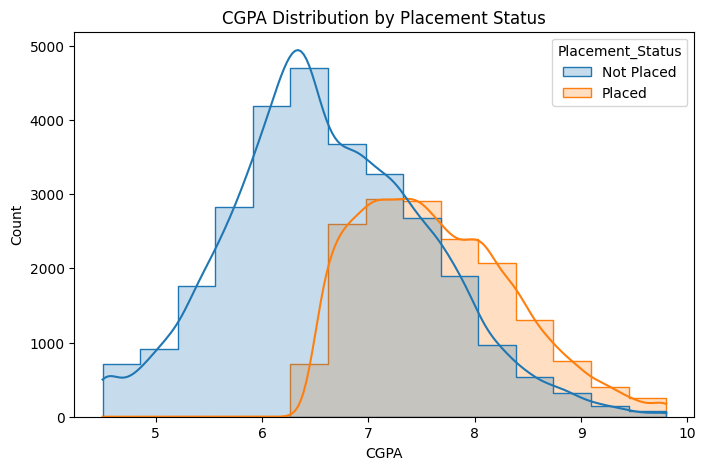

In [19]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x='CGPA',
    hue='Placement_Status',
    bins=15,
    kde=True,
    element='step'
)

plt.title('CGPA Distribution by Placement Status')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

To gain deeper insight into how CGPA relates to placement outcomes, I used a distribution chart with overlaid density plots. This visualization allows us to compare the full shape of CGPA distributions for placed and not placed students, beyond just summary statistics.

The results show a clear separation between the two groups. Students who were placed tend to have higher CGPAs, with their distribution skewed toward the upper end of the scale. In contrast, the not placed group is more concentrated around lower CGPA values. This pattern reinforces the earlier box plot findings and suggests that higher academic performance is associated with a greater likelihood of placement.

C:\Users\aayus\AppData\Local\Temp\ipykernel_47336\1682995637.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('CGPA_bin')
C:\Users\aayus\AppData\Local\Temp\ipykernel_47336\1682995637.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby('CGPA_bin').size()


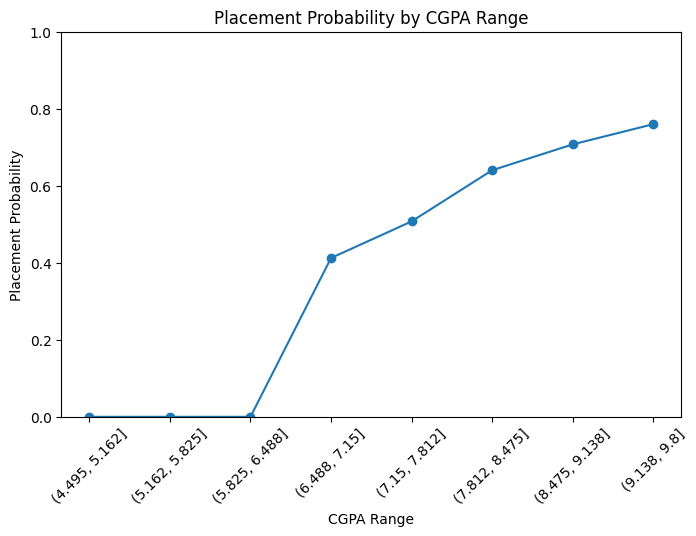

In [20]:
import numpy as np

# Bin CGPA
df['CGPA_bin'] = pd.cut(df['CGPA'], bins=8)

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('CGPA_bin')
    .size() / df.groupby('CGPA_bin').size()
)

plt.figure(figsize=(8,5))
plt.plot(
    placement_prob.index.astype(str),
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability by CGPA Range')
plt.xlabel('CGPA Range')
plt.ylabel('Placement Probability')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

To explore how CGPA influences placement outcomes more precisely, I plotted placement probability across CGPA ranges. This approach goes beyond summary statistics and shows how the likelihood of being placed changes as academic performance improves.

The results reveal a clear upward trend. Students with CGPAs below 6.5 have near-zero placement probability, but the likelihood increases steadily with higher CGPA ranges. In the top range (above 9.1), placement probability reaches around 75%. This pattern strongly suggests that higher CGPA is positively associated with placement success, reinforcing earlier findings from the box plot and distribution chart.

#### Internship Feature
Internship count is a strong experiential feature; students with more internships show a consistently higher probability of placement, especially when combined with strong academic performance.

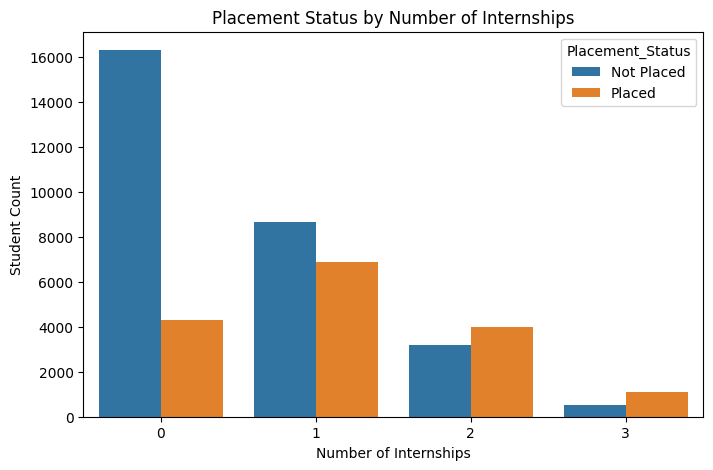

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Internships',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Internships')
plt.xlabel('Number of Internships')
plt.ylabel('Student Count')
plt.show()

To explore how internship experience affects placement outcomes, I used a bar chart to compare placement status across different internship counts. This visualization shows, for each internship level (0 to 3), how many students were placed versus not placed, allowing us to assess trends in placement success relative to internship exposure.

The results reveal a strong positive association. Students with no internships have the lowest placement count, while those with more internships—especially 2 or 3—show a higher proportion of placements. This suggests that internship experience may significantly boost placement chances, likely due to enhanced skills, industry exposure, and employability.

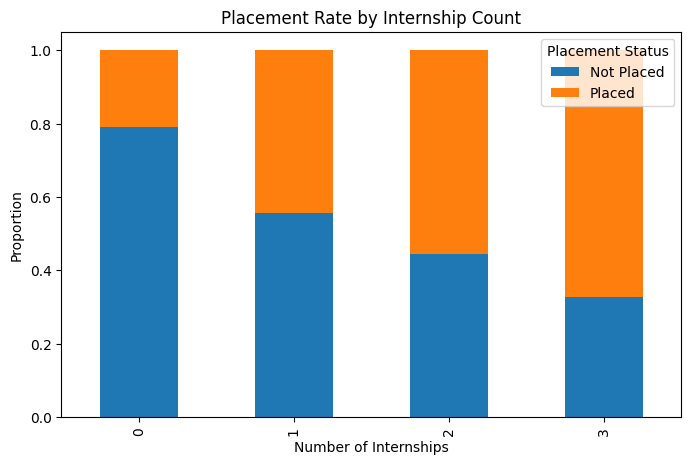

In [22]:
internship_rate = (
    df.groupby(['Internships', 'Placement_Status'])
    .size()
    .unstack()
)

internship_norm = internship_rate.div(
    internship_rate.sum(axis=1),
    axis=0
)

internship_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Internship Count')
plt.xlabel('Number of Internships')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()

To avoid the bias introduced by raw counts, I used a proportion-based bar chart to analyze placement outcomes across internship counts. This approach normalizes the data, allowing us to compare placement rates fairly across groups of different sizes.

The results show a strong upward trend in placement proportion as internship experience increases. Students with zero internships have the lowest placement rate, while those with three internships show the highest. This pattern suggests that internship experience is positively correlated with placement success, and may be a key factor influencing employability.

#### Projects Feature
The number of projects strongly correlates with placement success; students with more project experience show a significantly higher probability of being placed.

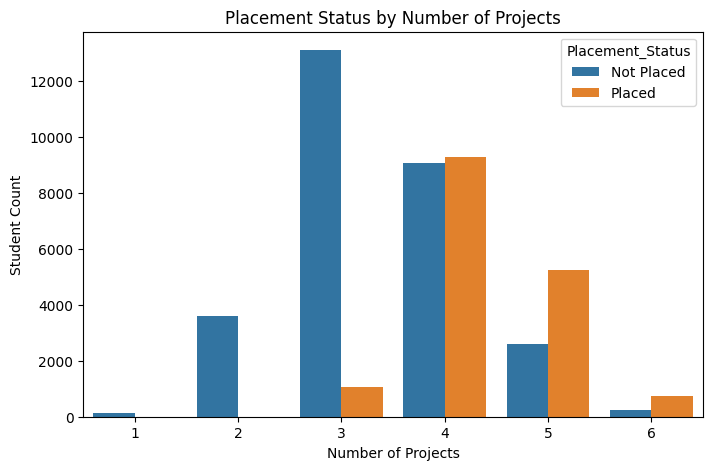

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Projects',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Student Count')
plt.show()

To examine how project experience relates to placement outcomes, I used a bar chart showing the count of placed and not placed students across different project counts. This visualization helps reveal how placement status varies with the number of completed projects, making it easier to spot trends in employability.

The results suggest a positive relationship. Students with fewer projects (1–3) are more likely to be not placed, while those with 4 or more projects show higher placement counts. The shift becomes especially noticeable at 4 projects, where the number of placed students overtakes the not placed group. This pattern indicates that project experience may contribute meaningfully to placement success, possibly by signaling stronger skills or initiative.

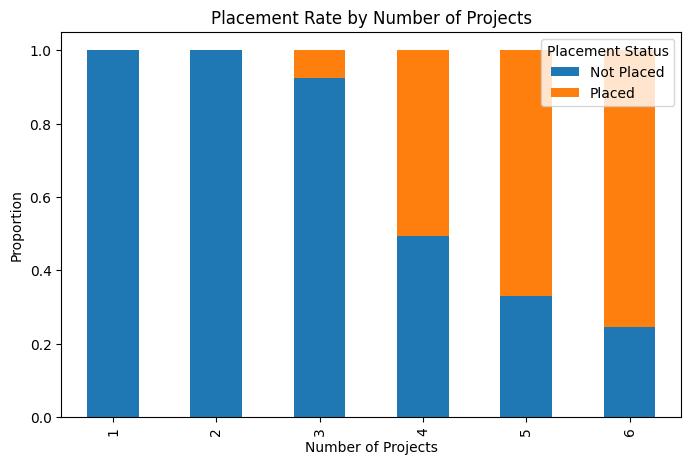

In [24]:
project_rate = (
    df.groupby(['Projects', 'Placement_Status'])
    .size()
    .unstack()
)

project_norm = project_rate.div(
    project_rate.sum(axis=1),
    axis=0
)

project_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.show()


To eliminate bias from raw counts, I used a proportion-based bar chart to analyze placement outcomes across project counts. This visualization reveals not just how many students were placed, but how likely placement was within each project group.

The results show a sharp divide at lower project counts. For students with 1 or 2 projects, placement rates are effectively zero — the bars are entirely blue, indicating that none of these students were placed. Placement probability begins to rise only from 3 projects onward, suggesting a possible threshold effect. This pattern implies that having very few projects may significantly reduce placement chances, and that a minimum level of project experience could be critical for employability.

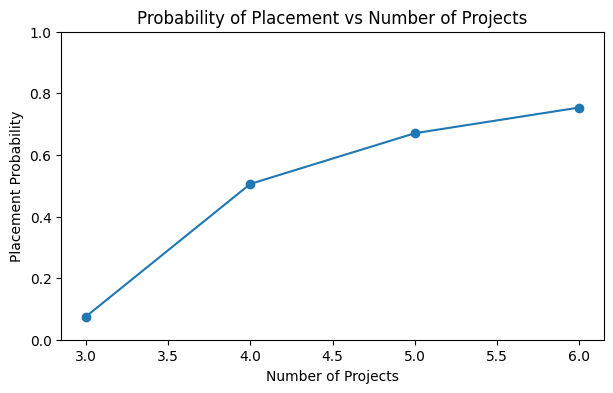

In [25]:
placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Projects')
    .size() / df.groupby('Projects').size()
)

plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Probability of Placement vs Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

To reinforce the pattern observed in earlier visualizations, I plotted placement probability against the number of projects. This line graph offers a clearer view of how placement likelihood changes as project experience increases.

The results show a strong upward trend. Placement probability rises sharply from just 10% at 3 projects to 80% at 6 projects, suggesting a consistent and meaningful relationship. This supports the idea that students with more project experience are significantly more likely to be placed, highlighting project count as a potentially influential predictor of placement success.

#### Coding Skills Feature
Coding skills are an ordinal feature, and the probability of placement increases monotonically with higher skill levels, making it one of the strongest predictors in the dataset.

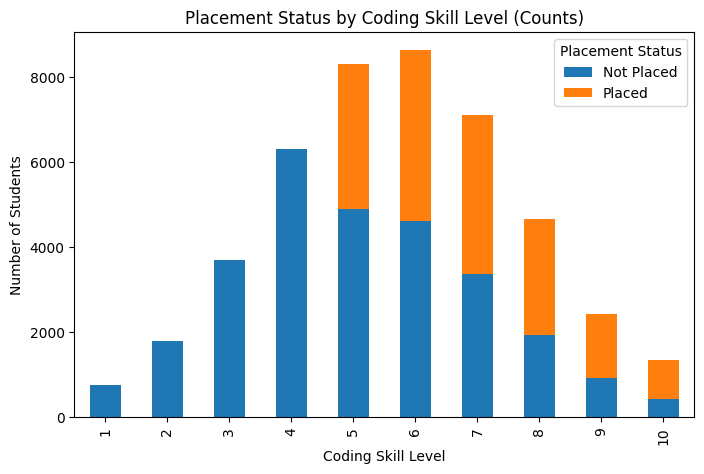

In [26]:
coding_counts = (
    df.groupby(['Coding_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

# Ensure ordinal order (1 → highest, or as defined in your data)
coding_counts = coding_counts.sort_index()

# Plot stacked bar chart
coding_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Status by Coding Skill Level (Counts)')
plt.xlabel('Coding Skill Level')
plt.ylabel('Number of Students')
plt.legend(title='Placement Status')
plt.show()

To evaluate how coding skill level influences placement outcomes, I used a bar chart showing placement counts across skill levels from 1 to 10. This visualization helps identify trends in employability as coding proficiency increases.

The results show a clear upward pattern. Students with lower coding skill levels (especially 1–4) are predominantly not placed, while those with higher skill levels (5–10) show a growing proportion of placements. The shift becomes especially noticeable around level 5, where the number of placed students begins to rival or exceed the not placed group. This suggests that stronger coding skills are positively associated with placement success, likely reflecting the technical requirements of the roles students are entering.

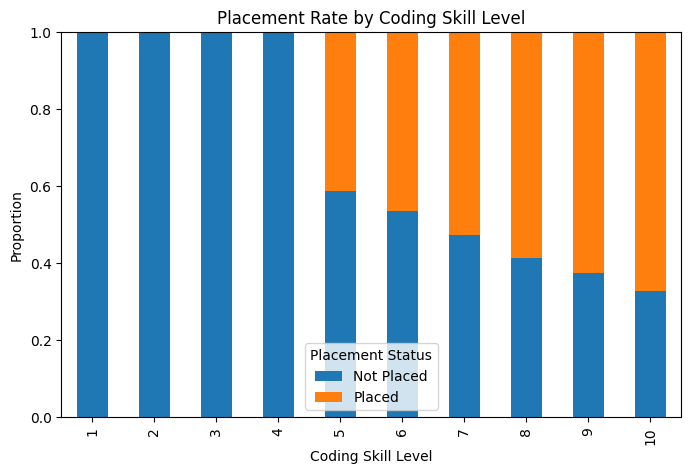

In [27]:
# Ensure correct ordering
skill_levels = sorted(df['Coding_Skills'].dropna().unique())

coding_counts = (
    df.groupby(['Coding_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

coding_counts = coding_counts.reindex(skill_levels, fill_value=0)

coding_norm = coding_counts.div(
    coding_counts.sum(axis=1),
    axis=0
)

coding_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Coding Skill Level')
plt.xlabel('Coding Skill Level')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.ylim(0, 1)
plt.show()
 

To assess how coding proficiency affects placement outcomes, I used a normalized bar chart showing placement proportions across coding skill levels from 1 to 10. This approach removes bias from group size differences and focuses purely on the likelihood of placement at each skill level.

The results reveal a striking pattern. Students with coding skill levels between 1 and 4 have a 100% not placed rate — none of them secured placements. Starting from level 5, placement probability begins to rise, and by levels 9 and 10, the majority of students are placed. This suggests a strong threshold effect: low coding skill is a major barrier to placement, while higher proficiency significantly improves employability.

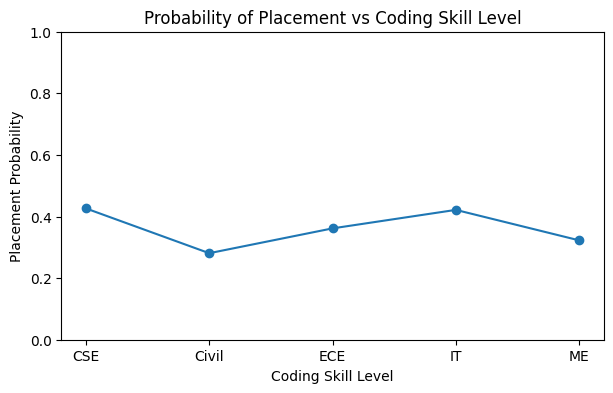

In [28]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_rate.index,
    placement_rate.values,
    marker='o'
)

plt.title('Probability of Placement vs Coding Skill Level')
plt.xlabel('Coding Skill Level')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

To reinforce the upward trend observed in earlier visualizations, I plotted placement probability against coding skill level. This line graph offers a clean, continuous view of how placement likelihood evolves as coding proficiency increases.

The results confirm a strong positive relationship. Placement probability rises steadily from level 5 onward, reaching its peak near level 10. This consistent increase supports the conclusion that higher coding skill levels are strongly associated with better placement outcomes, making this feature a compelling candidate for inclusion in predictive modeling.

#### Communication Feature

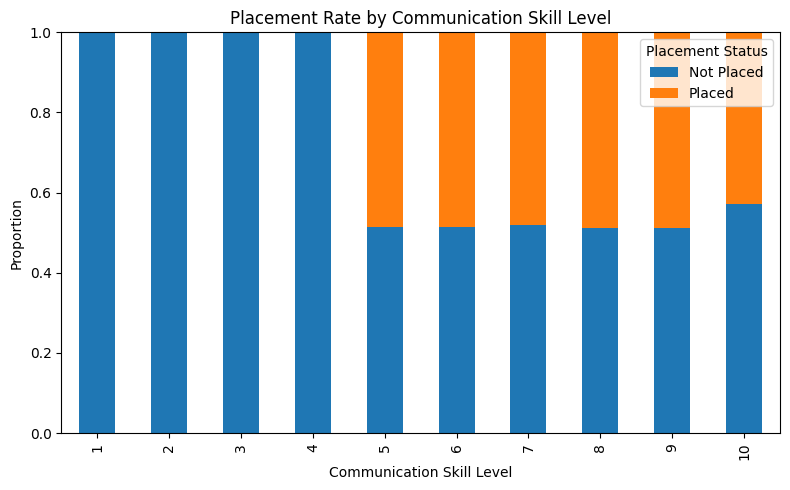

In [29]:
# Ensure correct order
comm_levels = sorted(df['Communication_Skills'].dropna().unique())

comm_counts = (
    df.groupby(['Communication_Skills', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

comm_counts = comm_counts.reindex(comm_levels, fill_value=0)

comm_norm = comm_counts.div(
    comm_counts.sum(axis=1),
    axis=0
)

comm_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.title('Placement Rate by Communication Skill Level')
plt.xlabel('Communication Skill Level')
plt.ylabel('Proportion')
plt.legend(title='Placement Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

To analyze the impact of communication skills on placement outcomes, a stacked bar chart was chosen to visualize the proportion of students placed versus not placed across different communication skill levels. The results reveal a clear pattern: individuals with communication skill levels from 1 to 4 were entirely not placed, indicating that low communication proficiency may be a critical barrier to employability. The plot reveals an interesting nuance: from communication skill levels 5 through 8, the placement rate appears relatively flat.  There’s no dramatic jump in the proportion of placed students across these mid‑range levels, which suggests that within this band, communication skill alone may not be a strong differentiator for placement outcomes.

#### Aptitude Test Score Feature

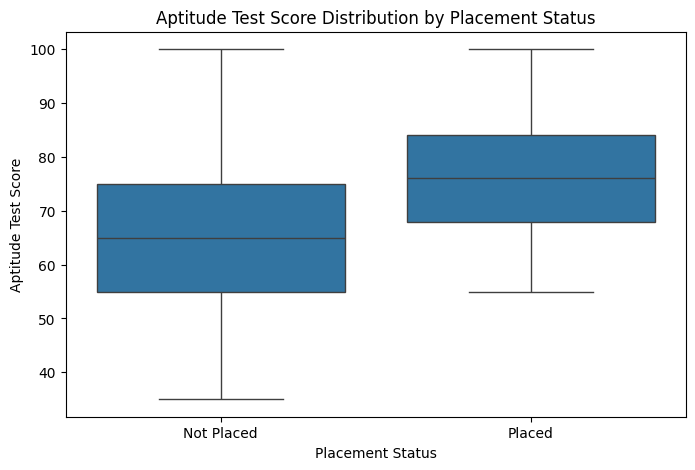

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Aptitude_Test_Score', data=df)

plt.title('Aptitude Test Score Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Aptitude Test Score')
plt.show()

To examine how aptitude test scores relate to placement outcomes, a box plot was used to compare score distributions between placed and not placed students. This visualization highlights key differences: placed students tend to have higher median scores and a tighter interquartile range, while not placed students show a wider spread and lower central tendency. The contrast in distributions suggests that stronger aptitude performance may be associated with a greater likelihood of placement, making test scores a potentially influential factor in the selection process.

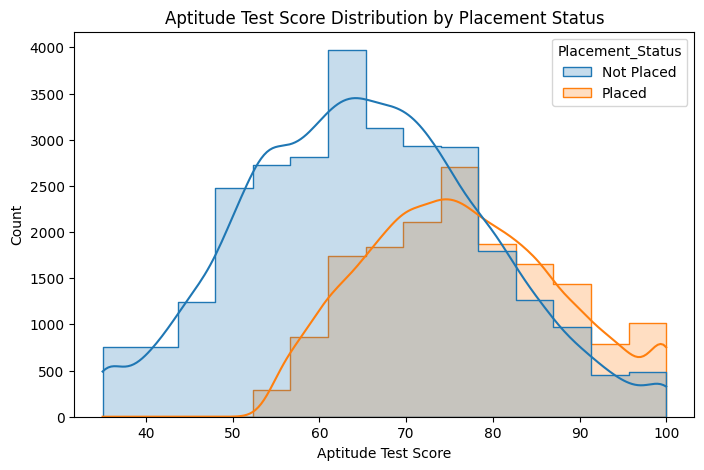

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Aptitude_Test_Score',
    hue='Placement_Status',
    bins=15,
    kde=True,
    element='step'
)

plt.title('Aptitude Test Score Distribution by Placement Status')
plt.xlabel('Aptitude Test Score')
plt.ylabel('Count')
plt.show()

To further explore how aptitude test scores relate to placement outcomes, a histogram with overlaid density plots was used to compare score distributions between placed and not placed students. This visualization reinforces the differences observed in the earlier box plot: the distribution for placed students is clearly shifted toward higher scores, with a peak around the 75–85 range. In contrast, the not placed group shows a broader spread with a peak closer to the 60–65 range and a longer tail toward lower scores. The separation between the two density curves suggests that higher aptitude scores are more common among placed individuals, supporting the idea that test performance may play a meaningful role in placement decisions. This visual not only confirms the central tendency differences but also highlights how the overall shape and concentration of scores differ between the two groups.

C:\Users\aayus\AppData\Local\Temp\ipykernel_47336\3064129834.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Score_bin')
C:\Users\aayus\AppData\Local\Temp\ipykernel_47336\3064129834.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby('Score_bin').size()


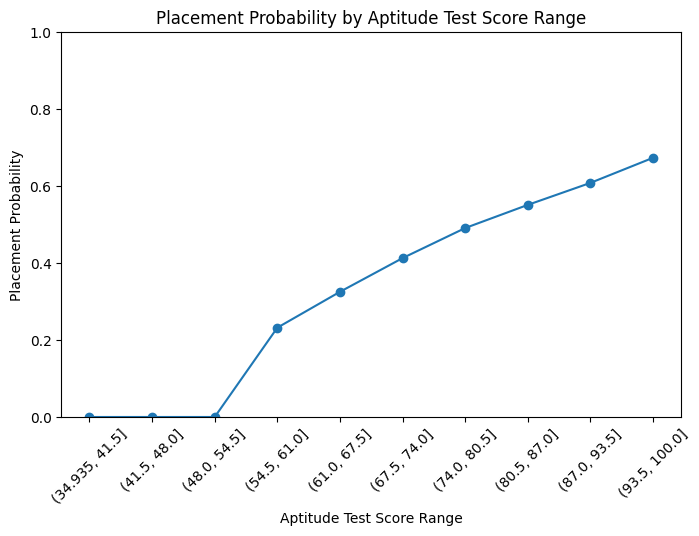

In [32]:
# Bin scores into 10-point ranges
df['Score_bin'] = pd.cut(df['Aptitude_Test_Score'], bins=10)

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Score_bin')
    .size() / df.groupby('Score_bin').size()
)

plt.figure(figsize=(8,5))
plt.plot(
    placement_prob.index.astype(str),
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability by Aptitude Test Score Range')
plt.xlabel('Aptitude Test Score Range')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()


To assess how aptitude test scores influence placement likelihood, a line graph was used to plot placement probability across score ranges. This visualization provides a clear, continuous view of how placement outcomes shift with increasing test performance. The results show a steady upward trend: placement probability begins near zero in the lowest score range and rises consistently across intervals, reaching approximately 70% in the highest range. This pattern reinforces the idea that higher aptitude scores are strongly associated with greater placement success, making test performance a valuable predictor in modeling and decision-making. The smooth progression also suggests that improvements in test scores—even within moderate ranges—can meaningfully enhance placement chances.

#### Soft Skill Feature

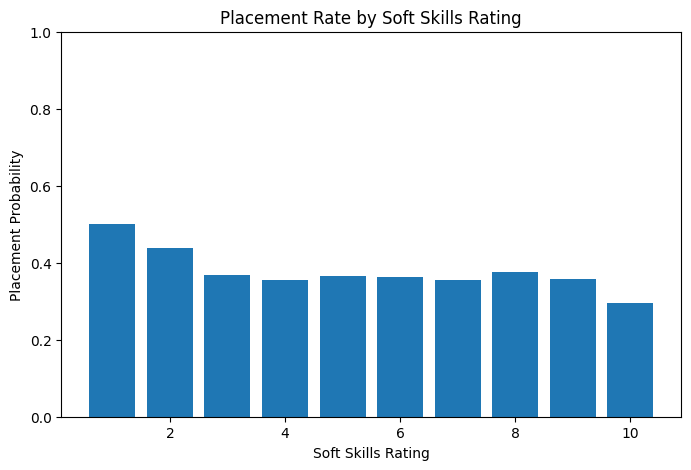

In [33]:
# Ensure ordinal order
soft_order = sorted(df['Soft_Skills_Rating'].unique())

placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Soft_Skills_Rating')
    .size() / df.groupby('Soft_Skills_Rating').size()
)

placement_prob = placement_prob.loc[soft_order]

plt.figure(figsize=(8,5))
plt.bar(placement_prob.index, placement_prob.values)

plt.title('Placement Rate by Soft Skills Rating')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

The soft skills rating chart reveals a clear and unexpected negative trend: as soft skill ratings increase from 1 to 10, the placement probability steadily declines. Instead of higher ratings corresponding to better outcomes, the highest placement rate appears at rating 1, while the lowest occurs at rating 10. This counterintuitive pattern suggests that soft skills, at least as measured in this dataset, may not function as a meaningful predictor of placement success. It also raises the possibility of subjective or inconsistent scoring, confounding effects from stronger technical or academic attributes, or even reversed interpretation of the rating scale. Overall, the visual indicates that soft skill rating alone does not reliably explain placement outcomes and should be interpreted cautiously within the broader modeling context.

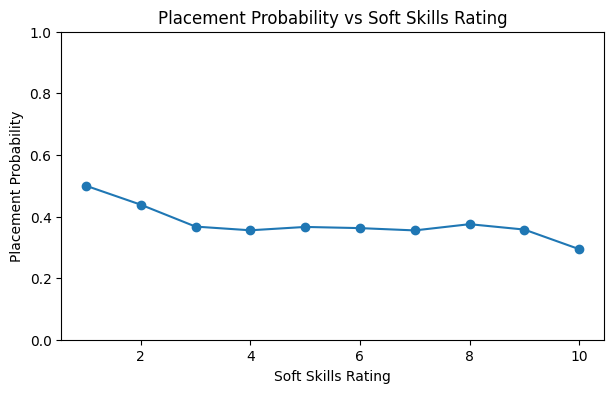

In [34]:
plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability vs Soft Skills Rating')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

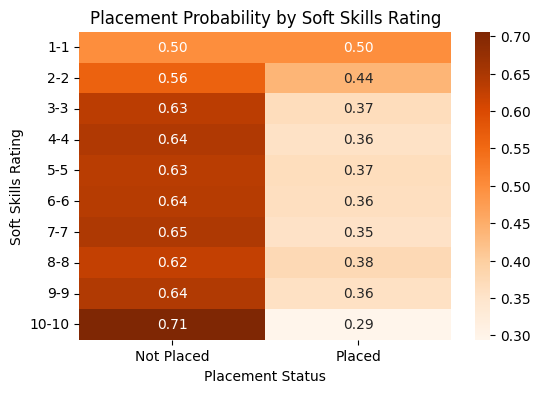

In [35]:
heatmap_data = (
    df.groupby(['Soft_Skills_Rating', 'Placement_Status'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

heatmap_data = heatmap_data.loc[soft_order]

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Oranges'
)

plt.title('Placement Probability by Soft Skills Rating')
plt.xlabel('Placement Status')
plt.ylabel('Soft Skills Rating')
plt.show()

# Certification Feature 
Certification count is a discrete feature, and students with more certifications generally have higher placement probability, especially when combined with practical experience from projects or internships.

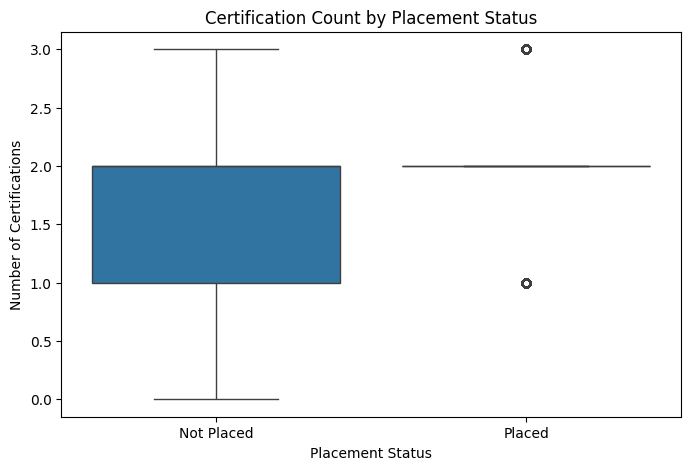

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Certifications', data=df)

plt.title('Certification Count by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Number of Certifications')
plt.show()

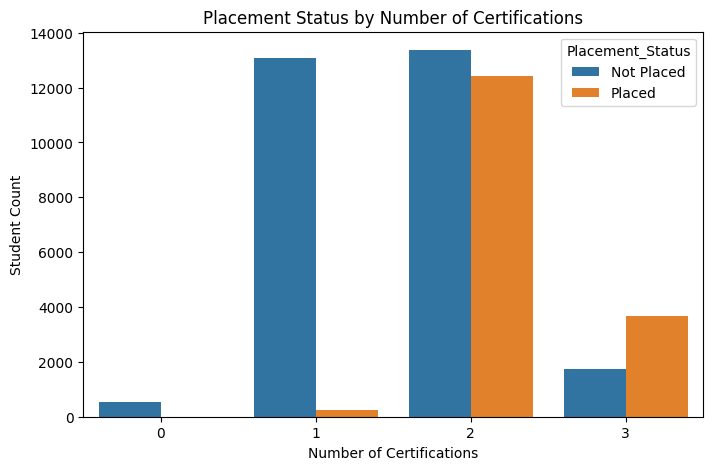

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Certifications',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Student Count')
plt.show()

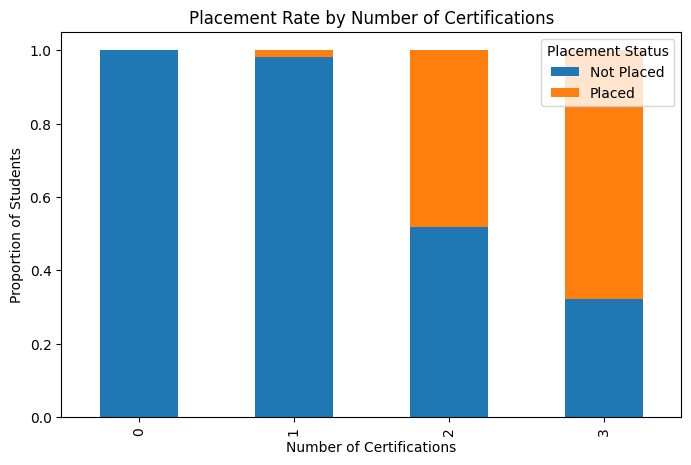

In [38]:
cert_rate = (
    df.groupby(['Certifications', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

cert_norm = cert_rate.div(cert_rate.sum(axis=1), axis=0)

cert_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Proportion of Students')
plt.legend(title='Placement Status')
plt.show()

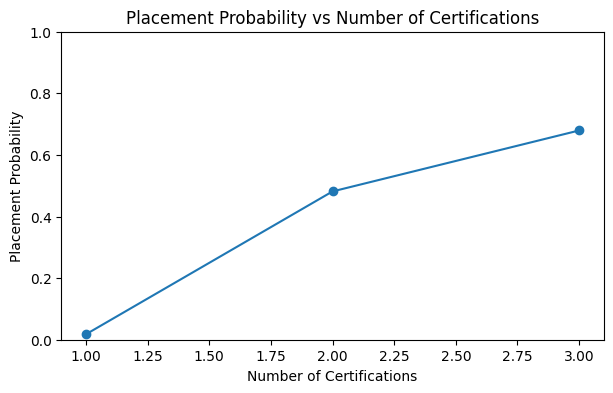

In [39]:
placement_prob = (
    df[df['Placement_Status'] == 'Placed']
    .groupby('Certifications')
    .size() / df.groupby('Certifications').size()
)

plt.figure(figsize=(7,4))
plt.plot(
    placement_prob.index,
    placement_prob.values,
    marker='o'
)

plt.title('Placement Probability vs Number of Certifications')
plt.xlabel('Number of Certifications')
plt.ylabel('Placement Probability')
plt.ylim(0,1)
plt.show()

# Backlog Feature
Backlogs measure courses that a student hasn’t cleared yet. They are negatively correlated with placement, as companies prefer students who have completed their coursework on time.

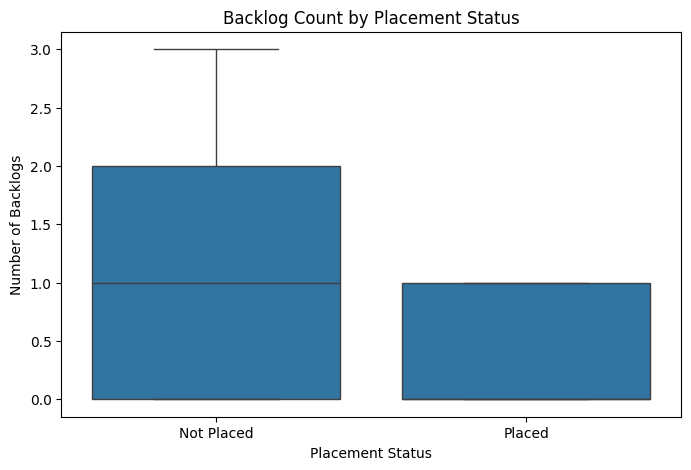

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement_Status', y='Backlogs', data=df)

plt.title('Backlog Count by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Number of Backlogs')
plt.show()

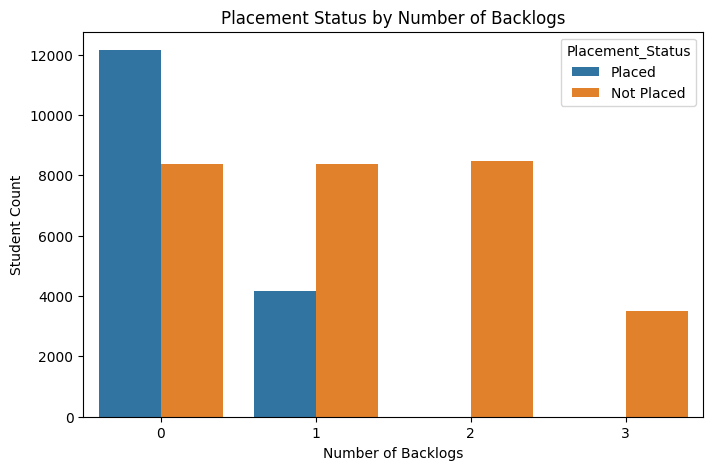

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Backlogs',
    hue='Placement_Status'
)

plt.title('Placement Status by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Student Count')
plt.show()

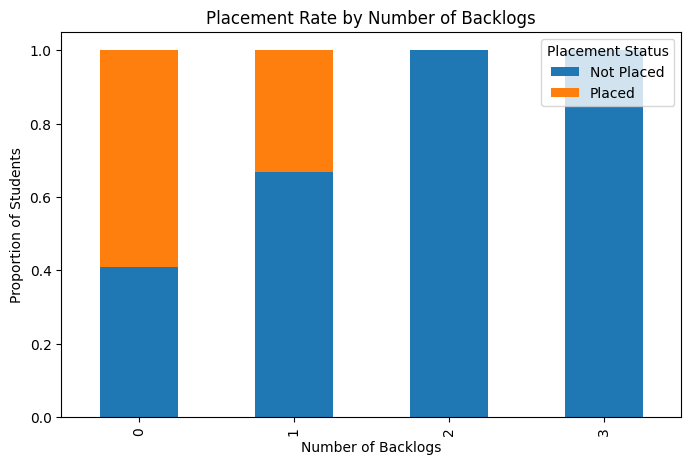

In [42]:
backlog_rate = (
    df.groupby(['Backlogs', 'Placement_Status'])
    .size()
    .unstack(fill_value=0)
)

backlog_norm = backlog_rate.div(backlog_rate.sum(axis=1), axis=0)

backlog_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Placement Rate by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Proportion of Students')
plt.legend(title='Placement Status')
plt.show()

# Using Random Forest to Find Important Features 

### Random Forest with Selected Features

Accuracy: 1.0

Confusion Matrix:
 [[3188    0]
 [   0 1812]]

Classification Report:
               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      3188
      Placed       1.00      1.00      1.00      1812

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000


Feature Ranking:
 1) Communication_Skills                     0.3161
 2) Backlogs                                 0.1792
 3) CGPA                                     0.1586
 4) Coding_Skills                            0.0980
 5) Projects                                 0.0975
 6) Certifications                           0.0735
 7) Aptitude_Test_Score                      0.0641
 8) Internships                              0.0094
 9) Soft_Skills_Rating                       0.0017
10) Branch_Civil                             0.0008
11) Branch_IT                                0.00

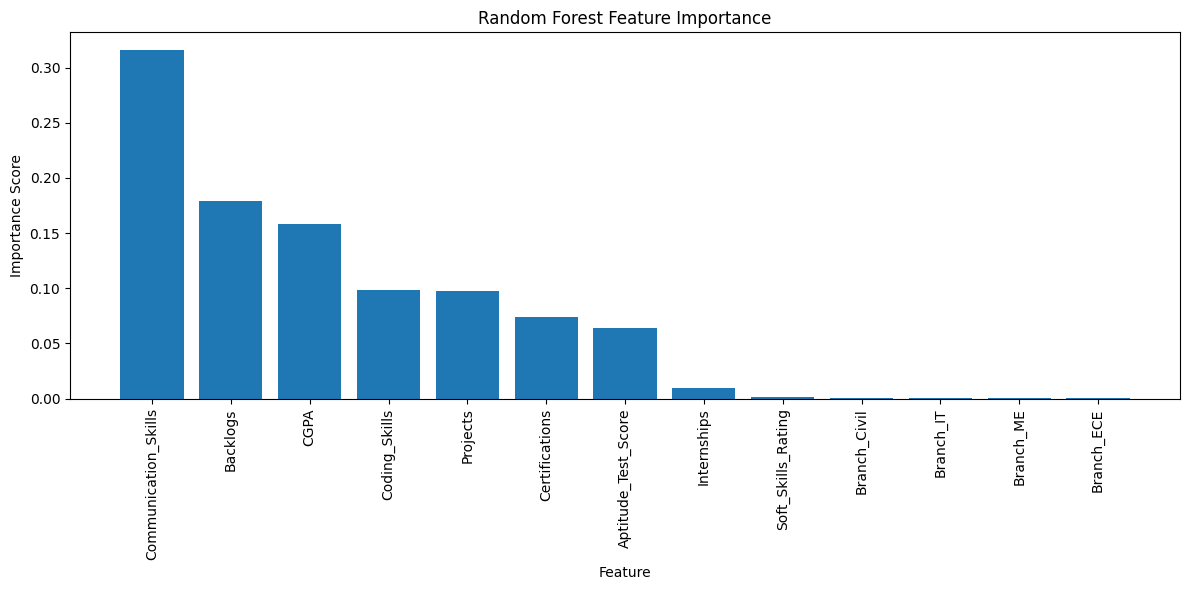

In [43]:
# Importing Train Dataset for Model Training
# train_df = pd.read_csv("../Student Placement Dataset/train.csv")

# Impoting Test Dataset for Final Predictions
# test_df = pd.read_csv("../Student Placement Dataset/test.csv")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select Features & Target
features = [
    'Communication_Skills',
    'Branch',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]

X_train = train_df[features]
y_train = train_df['Placement_Status']

X_test = test_df[features]
y_test = test_df['Placement_Status']

# One-Hot Encode ONLY
X_train_encoded = pd.get_dummies(
    X_train,
    columns=['Branch'],
    drop_first=True
)

X_test_encoded = pd.get_dummies(
    X_test,
    columns=['Branch'],
    drop_first=True
)

# Align Train & Test Columns (CRITICAL)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

# Train Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

rf.fit(X_train_encoded, y_train)

# Evaluate on Test Set
y_pred = rf.predict(X_test_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feature_names = X_train_encoded.columns

indices = np.argsort(importances)[::-1]

# Print Feature Rankings
print("\nFeature Ranking:")
for i in range(len(feature_names)):
    print(
        f"{i+1:2d}) {feature_names[indices[i]]:<40} {importances[indices[i]]:.4f}"
    )

# Feature Importance Plot
plt.figure(figsize=(12,6))
plt.title('Random Forest Feature Importance')

plt.bar(
    range(len(feature_names)),
    importances[indices],
    align='center'
)

plt.xticks(
    range(len(feature_names)),
    feature_names[indices],
    rotation=90
)

plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

### Random Forest with All Features

Accuracy: 1.0

Confusion Matrix:
 [[3188    0]
 [   0 1812]]

Classification Report:
               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      3188
      Placed       1.00      1.00      1.00      1812

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000


Top 15 Features (All Variables Model):
 1) Communication_Skills                     0.3147
 2) Backlogs                                 0.1787
 3) CGPA                                     0.1619
 4) Coding_Skills                            0.0979
 5) Projects                                 0.0930
 6) Certifications                           0.0731
 7) Aptitude_Test_Score                      0.0639
 8) Internships                              0.0086
 9) Age                                      0.0018
10) Soft_Skills_Rating                       0.0017
11) Branch_Civil           

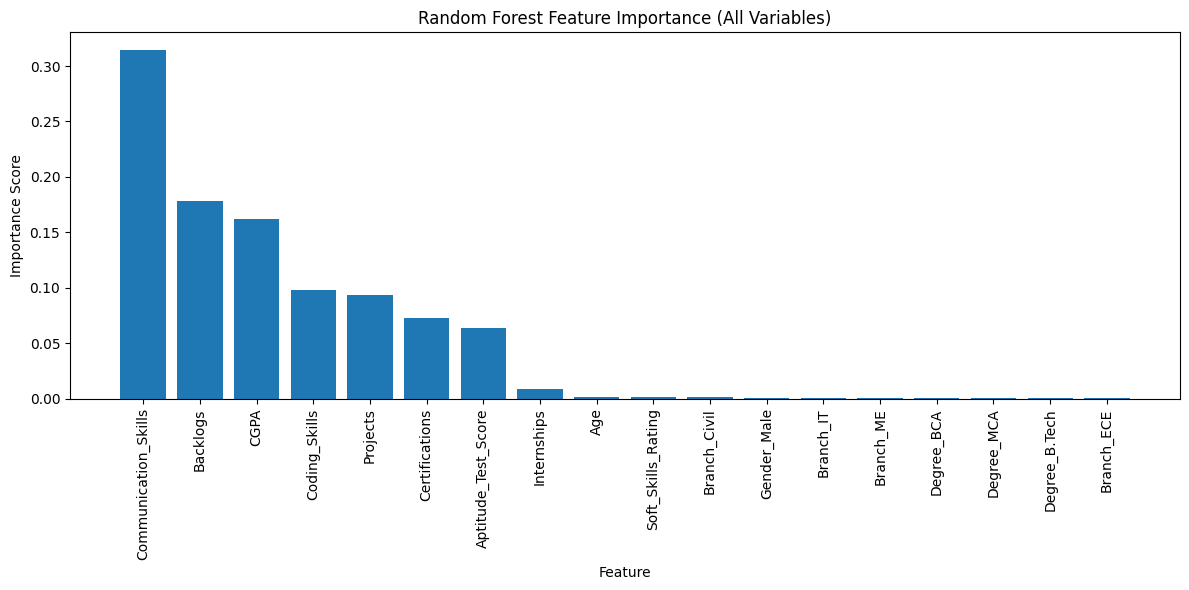

In [44]:
# All Feature Except Target
numeric_features = [
    'Age',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Communication_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]

categorical_features = [
    'Branch',
    'Degree',
    'Gender'
]

# Create X and Y
X_train = train_df[numeric_features + categorical_features]
y_train = train_df['Placement_Status']

X_test = test_df[numeric_features + categorical_features]
y_test = test_df['Placement_Status']

# One-Hot Encode Nominal Features
X_train_encoded = pd.get_dummies(
    X_train,
    columns=categorical_features,
    drop_first=True
)

X_test_encoded = pd.get_dummies(
    X_test,
    columns=categorical_features,
    drop_first=True
)

# Align Train & Test Columns (CRITICAL)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

# Train Random Forest (Same Hyperparameters)
rf_all = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

rf_all.fit(X_train_encoded, y_train)

# Evaluate on Test Set
y_pred_all = rf_all.predict(X_test_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred_all))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_all))
print("\nClassification Report:\n", classification_report(y_test, y_pred_all))

# Feature Importance (All Variables)
importances = rf_all.feature_importances_
feature_names = X_train_encoded.columns
indices = np.argsort(importances)[::-1]

# Print Feature Rankings
print("\nTop 15 Features (All Variables Model):")
for i in range(15):
    print(
        f"{i+1:2d}) {feature_names[indices[i]]:<40} {importances[indices[i]]:.4f}"
    )

# Feature Importance Plot
plt.figure(figsize=(12,6))
plt.title('Random Forest Feature Importance (All Variables)')

plt.bar(
    range(len(feature_names)),
    importances[indices],
    align='center'
)

plt.xticks(
    range(len(feature_names)),
    feature_names[indices],
    rotation=90
)

plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


### 2.5 Give Simple Appropriate Statistics 

### 2.6 Give Simple Appropriate Statistics 

### 2.7 Feature Engineering

## Feature Engineering: Potential Enhancements

Although the current dataset already provides strong coverage of academic performance, skills, and experience, additional features could be derived from existing variables to further improve predictive performance. These features were not implemented in this analysis but represent logical extensions for future modeling efforts.

### Skill Composite Score
Rather than treating coding skills, communication skills, and soft skills as separate variables, these measures could be combined into a single composite score. By averaging or summing these attributes, the resulting feature would provide a more holistic representation of a student’s overall readiness for professional roles.

### Experience Index
Practical exposure could be summarized through an experience index created by combining the number of internships, completed projects, and earned certifications. This feature would capture hands-on learning and professional engagement more effectively than individual experience variables considered in isolation.

### Academic Risk Indicator
The effect of academic backlogs could be simplified using a binary risk indicator. For example, students with one or more backlogs could be flagged as higher academic risk, while students with no backlogs would be classified as lower risk. This approach aligns well with how recruiters often apply eligibility thresholds.

### Interaction Features
Certain relationships in placement outcomes may be non-linear and better explained through interaction terms. Interactions such as CGPA multiplied by aptitude test scores or coding skills combined with project experience could capture cases where strong performance in one area amplifies the effect of another.

### Significance
These engineered features have the potential to improve both interpretability and predictive accuracy by capturing higher-level patterns that individual variables may not fully represent. They also better reflect real-world hiring considerations, making them valuable candidates for future model development.
